In [1]:
!pip install -q -U google-generativeai

In [4]:
import pathlib
import google.generativeai as genai
import os

In [5]:
os.environ["GOOGLE_API_KEY"] = "<key-api-gemini>"

In [8]:
GOOGLE_API_KEY=os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [9]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash


Definição de modelo a ser utilizado. Nesse caso, vamos utilizar o gemini-1.5-flash

In [10]:
model = genai.GenerativeModel('gemini-1.5-flash')

# Texto

In [12]:
response = model.generate_content("Quantas medalhas de outro o Brasil teve na última Olimíada?")

In [14]:
response.text

'O Brasil ganhou **21 medalhas** na última Olimpíada, realizada em Tóquio em 2020. \n\n* **7 medalhas de ouro**\n* **6 medalhas de prata**\n* **8 medalhas de bronze** \n\nEspero ter ajudado! 😊\n'

Na resposta, podemos observar os resultados, a categoria que foi classificada o texto (sexual, ódio, assédio e perigoso) além da quantidade de tokens

In [13]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "O Brasil ganhou **21 medalhas** na \u00faltima Olimp\u00edada, realizada em T\u00f3quio em 2020. \n\n* **7 medalhas de ouro**\n* **6 medalhas de prata**\n* **8 medalhas de bronze** \n\nEspero ter ajudado! \ud83d\ude0a\n"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
     

Também há a opção de stream

In [15]:
response = model.generate_content("Quantas medalhas de outro o Brasil teve na última Olimíada?", stream=True)

In [21]:
for text in response:
  print(text.text, end='\n'+'-'*50+'\n')

O
--------------------------------------------------
 Brasil conquistou **21 medalhas** na última Olimpíada, realizada
--------------------------------------------------
 em Tóquio em 2020 (realizada em 20
--------------------------------------------------
21 devido à pandemia). 

* **7 medalhas de ouro**
* **6 medalhas de prata**
* **8 medalhas de
--------------------------------------------------
 bronze**

Essa foi a melhor participação do Brasil em uma Olimpíada, superando o número de medalhas conquistadas em Londres 2012
--------------------------------------------------
 e Rio 2016.

--------------------------------------------------


# Imagem

In [30]:
!curl -o image.jpg https://conteudize.ai/blog/wp-content/uploads/2024/06/como-criar-prompts-para-geracao-de-imagens-com-ia.webp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  184k  100  184k    0     0   762k      0 --:--:-- --:--:-- --:--:--  764k


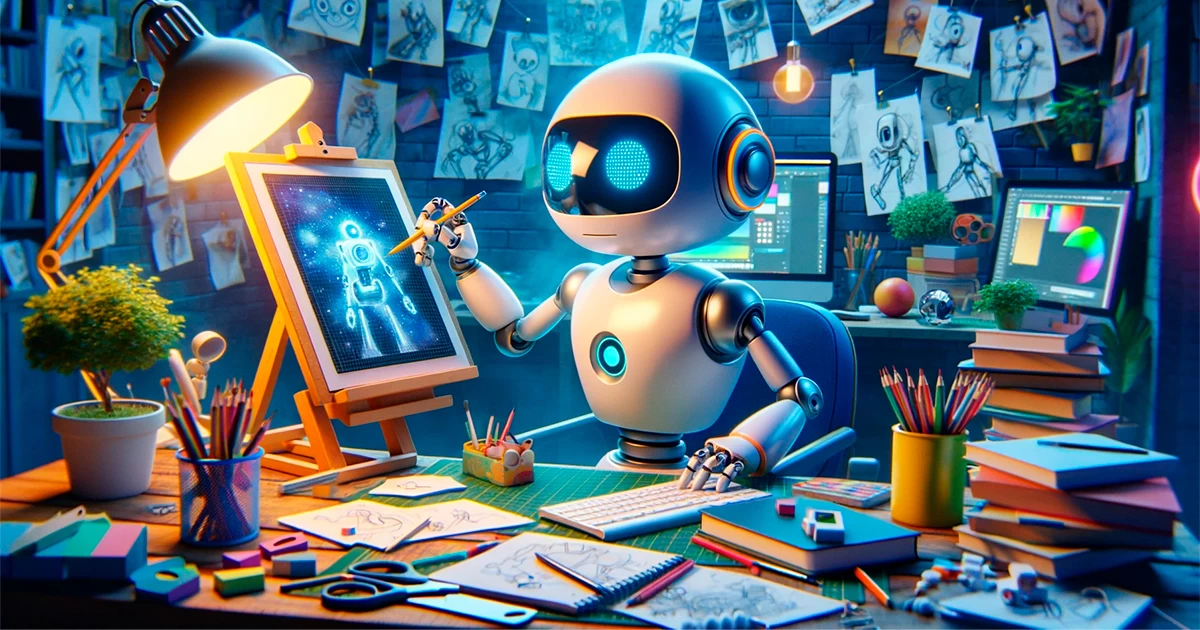

In [31]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [25]:
response_img = model.generate_content(img)

In [32]:
response = model.generate_content(["O que você vê nessa imagem? Descreva de forma bem descritiva. Além disso, o que essa imagem quer dizer no presente e no futuro?", img], stream=True)

In [33]:
response.resolve()

In [34]:
response.text

'A imagem mostra um robô branco sentado em frente a uma mesa, com uma tela de desenho em um cavalete à sua frente. O robô está segurando um lápis e está desenhando o que parece ser um outro robô na tela. O robô parece ter olhos azuis brilhantes e um sorriso gentil. Ele está usando um chapéu branco com uma faixa amarela. A mesa está cheia de materiais artísticos, como lápis, canetas, borracha e papel. Também há um computador, um teclado e um mouse na mesa. A imagem é configurada em uma sala cheia de desenhos em diferentes estágios de conclusão, que são pendurados na parede atrás do robô. A iluminação é quente e aconchegante, e há um abajur ligado no canto superior esquerdo da imagem.\n\nA imagem sugere que a inteligência artificial pode ter um papel significativo no futuro da criatividade. O robô na imagem representa as capacidades cada vez maiores da IA para gerar arte, design, música e outros trabalhos criativos. A cena sugere que a IA pode ser usada para complementar e melhorar as ha

# PDF

In [38]:
!curl -k -o pdf_cartilha_participante_enem2023.pdf https://download.inep.gov.br/publicacoes/institucionais/avaliacoes_e_exames_da_educacao_basica/a_redacao_no_enem_2023_cartilha_do_participante.pdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5380k  100 5380k    0     0   663k      0  0:00:08  0:00:08 --:--:--  768k


In [47]:
response = model.generate_content(
    genai.protos.Content(
        parts = [
            genai.protos.Part(text="Segundo a cartilha do participante do Enem, o que preciso seguir para me destacar na escrita da redação? Além disso, qual capítulo estão as redações exemplares?"),
            genai.protos.Part(
                inline_data=genai.protos.Blob(
                    mime_type='application/pdf',
                    data=pathlib.Path('/content/pdf_cartilha_participante_enem2023.pdf').read_bytes()
                )
            )
        ]
    ),
    stream=True)

In [48]:
response.resolve()

In [49]:
print(response)

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "De acordo com a cartilha do participante do Enem, para se destacar na reda\u00e7\u00e3o voc\u00ea precisa:\n\n* **Demonstrar dom\u00ednio da modalidade escrita formal da l\u00edngua portuguesa:** seguir as regras gramaticais, de ortografia, de acentua\u00e7\u00e3o, de pontua\u00e7\u00e3o, de concord\u00e2ncia e de reg\u00eancia.\n* **Compreender a proposta de reda\u00e7\u00e3o e aplicar conceitos das v\u00e1rias \u00e1reas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa:** entender o tema proposto, ler com aten\u00e7\u00e3o os textos motivadores e construir uma argumenta\u00e7\u00e3o consistente que defenda seu ponto de vista sobre o tema.\n* **Selecionar, relacionar, organizar e interpreta

In [50]:
print(response.text)

De acordo com a cartilha do participante do Enem, para se destacar na redação você precisa:

* **Demonstrar domínio da modalidade escrita formal da língua portuguesa:** seguir as regras gramaticais, de ortografia, de acentuação, de pontuação, de concordância e de regência.
* **Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo em prosa:** entender o tema proposto, ler com atenção os textos motivadores e construir uma argumentação consistente que defenda seu ponto de vista sobre o tema.
* **Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista:** organizar as ideias de forma coerente, usando recursos coesivos para conectar as partes do texto, evitando repetições desnecessárias e informações irrelevantes.
* **Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da arg